In [1]:
!pip install bubbly

In [2]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
from bubbly.bubbly import bubbleplot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import country_converter as coco

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder
# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB # Classifier 
import sklearn.metrics as m # Metrics to determine the classification 
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")






In [3]:
#Import data
dat_suicide = pd.read_csv("data.csv")
dat_Psychiatrists =pd.read_csv("data_Psychiatrists working.csv")
dat_hosipital = pd.read_csv("data_mental_hospital.csv")

In [4]:
dat_dem = pd.read_csv("V_Dem_CY_Full_Others_v11.1.csv")

In [5]:
#Select the columns we want
dat_dem = dat_dem.loc[:, ['country_name','year','v2x_civlib','v2pehealth','e_pelifeex',
                  'v2peedueq','e_regiongeo','v2x_rule','v2xeg_eqdr', 'v2dlunivl','v2smonex','v2clslavef']]


dat_dem = dat_dem.rename(columns = {'v2x_civlib':'civil_liberties','v2pehealth': 'health',
                                   'e_pelifeex':'life_expectancy','v2peedueq':'edu_equality','e_regiongeo':'region',
                                   'v2x_rule':'law','v2xeg_eqdr':'resource_distribution','v2dlunivl':'welfare','v2smonex':'online_media',
                                    'v2clslavef':'women_forcedlabor'
                                   })

In [6]:
dat_dem

,country_name,year,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor
0,Mexico,1789,0.212,NaN,NaN,NaN,17,0.249,NaN,NaN,NaN,-2.141
1,Mexico,1790,0.212,NaN,NaN,NaN,17,0.249,NaN,NaN,NaN,-2.141
2,Mexico,1791,0.212,NaN,NaN,NaN,17,0.249,NaN,NaN,NaN,-2.141
3,Mexico,1792,0.212,NaN,NaN,NaN,17,0.249,NaN,NaN,NaN,-2.141
4,Mexico,1793,0.212,NaN,NaN,NaN,17,0.249,NaN,NaN,NaN,-2.141
...,...,...,...,...,...,...,...,...,...,...,...,...
27187,Piedmont-Sardinia,1857,0.606,NaN,NaN,NaN,3,0.549,NaN,NaN,NaN,-0.871
27188,Piedmont-Sardinia,1858,0.606,NaN,NaN,NaN,3,0.549,NaN,NaN,NaN,-0.871
27189,Piedmont-Sardinia,1859,0.606,NaN,NaN,NaN,3,0.549,NaN,NaN,NaN,-0.871
27190,Piedmont-Sardinia,1860,0.606,NaN,NaN,NaN,3,0.549,NaN,NaN,NaN,-0.871


In [7]:
dat_dem["country_name"].unique()

array(['Mexico', 'Suriname', 'Sweden', 'Switzerland', 'Ghana',
       'South Africa', 'Japan', 'Burma/Myanmar', 'Russia', 'Albania',
       'Egypt', 'Yemen', 'Colombia', 'Poland', 'Brazil',
       'United States of America', 'Portugal', 'El Salvador',
       'South Yemen', 'Bangladesh', 'Bolivia', 'Haiti', 'Honduras',
       'Mali', 'Pakistan', 'Peru', 'Senegal', 'South Sudan', 'Sudan',
       'Vietnam', 'Republic of Vietnam', 'Afghanistan', 'Argentina',
       'Ethiopia', 'India', 'Kenya', 'North Korea', 'South Korea',
       'Kosovo', 'Lebanon', 'Nigeria', 'Philippines', 'Tanzania',
       'Taiwan', 'Thailand', 'Uganda', 'Venezuela', 'Benin', 'Bhutan',
       'Burkina Faso', 'Cambodia', 'Indonesia', 'Mozambique', 'Nepal',
       'Nicaragua', 'Niger', 'Zambia', 'Zimbabwe', 'Guinea',
       'Ivory Coast', 'Mauritania', 'Canada', 'Australia', 'Botswana',
       'Burundi', 'Cape Verde', 'Central African Republic', 'Chile',
       'Costa Rica', 'Timor-Leste', 'Ecuador', 'France', 'Germany

In [8]:
#Select year from 2000
dat_dem = dat_dem.loc[dat_dem['year'] > 1999]
dat_dem = dat_dem.loc[dat_dem['year'] < 2021]
#Change the columns name
dat_dem = dat_dem.rename(columns = {'year':'Period'})
dat_dem = dat_dem.rename(columns = {'country_name':'Location'})

In [9]:
dat_suicide.head()#suicide rates: the number of people who commit suicide per 100,000
dat_suicide = dat_suicide.loc[:, ['Location','Period','FactValueNumeric','Dim1']]
dat_suicide = dat_suicide.rename(columns = {'FactValueNumeric':'suicide_value'})
dat_suicide = dat_suicide.rename(columns = {'Dim1':'Sex'})


In [10]:
dat_suicide.info()
print("Dataset shape\n",dat_suicide.shape)
print("Check null data\n", dat_suicide.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       10980 non-null  object 
 1   Period         10980 non-null  int64  
 2   suicide_value  10980 non-null  float64
 3   Sex            10980 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 343.2+ KB
Dataset shape
 (10980, 4)
Check null data
 Location         0
Period           0
suicide_value    0
Sex              0
dtype: int64


In [11]:
dat_suicide['suicide_value'] = dat_suicide['suicide_value'].astype(float)

In [12]:
dat_suicide_male = dat_suicide.loc[dat_suicide['Sex'] == 'Male']
dat_suicide_female = dat_suicide.loc[dat_suicide['Sex'] == 'Female']
dat_suicide_gender = dat_suicide_male.merge(dat_suicide_female,how = 'left', on = ["Location",'Period'], indicator = True)
dat_suicide_gender

,Location,Period,suicide_value_x,Sex_x,suicide_value_y,Sex_y,_merge
0,Antigua and Barbuda,2019,0.00,Male,0.60,Female,both
1,Barbados,2019,0.49,Male,0.16,Female,both
2,Grenada,2019,0.53,Male,0.73,Female,both
3,Saint Vincent and the Grenadines,2019,1.33,Male,0.67,Female,both
4,Morocco,2019,10.07,Male,4.70,Female,both
...,...,...,...,...,...,...,...
3655,United Arab Emirates,2000,9.35,Male,4.69,Female,both
3656,Viet Nam,2000,9.40,Male,5.16,Female,both
3657,Portugal,2000,9.45,Male,2.11,Female,both
3658,Ecuador,2000,9.64,Male,4.16,Female,both


In [13]:
#Drop value = 0
dat_suicide_gender = dat_suicide_gender[~dat_suicide_gender['suicide_value_x'].isin([0.00])]
dat_suicide_gender = dat_suicide_gender[~dat_suicide_gender['suicide_value_y'].isin([0.00])]

In [14]:
dat_suicide_gender = dat_suicide_gender.rename(columns = {'suicide_value_x':'suicide_value_male'})
dat_suicide_gender = dat_suicide_gender.rename(columns = {'suicide_value_y':'suicide_value_female'})
#Drop 'merge' column
dat_suicide_gender.drop('_merge',axis=1,inplace=True)



In [15]:
dat_suicide_gender['ratio_m/f']= dat_suicide_gender['suicide_value_male']/dat_suicide_gender['suicide_value_female']

In [16]:
dat_suicide_gender['ratio_f/m']= dat_suicide_gender['suicide_value_female']/dat_suicide_gender['suicide_value_male']

In [17]:
dat_suicide_gender

,Location,Period,suicide_value_male,Sex_x,suicide_value_female,Sex_y,ratio_m/f,ratio_f/m
1,Barbados,2019,0.49,Male,0.16,Female,3.062500,0.326531
2,Grenada,2019,0.53,Male,0.73,Female,0.726027,1.377358
3,Saint Vincent and the Grenadines,2019,1.33,Male,0.67,Female,1.985075,0.503759
4,Morocco,2019,10.07,Male,4.70,Female,2.142553,0.466733
5,Nigeria,2019,10.13,Male,3.79,Female,2.672823,0.374136
...,...,...,...,...,...,...,...,...
3655,United Arab Emirates,2000,9.35,Male,4.69,Female,1.993603,0.501604
3656,Viet Nam,2000,9.40,Male,5.16,Female,1.821705,0.548936
3657,Portugal,2000,9.45,Male,2.11,Female,4.478673,0.223280
3658,Ecuador,2000,9.64,Male,4.16,Female,2.317308,0.431535


In [18]:
dat_suicide_ratio1=dat_suicide_gender[['Location','ratio_m/f']].groupby(['Location']).agg({'ratio_m/f':'mean'}).sort_values(by='ratio_m/f',ascending=False).head(20).reset_index()
dat_suicide_ratio1

,Location,ratio_m/f
0,Solomon Islands,14.040111
1,Seychelles,9.750899
2,Saint Lucia,8.381919
3,Ghana,8.275352
4,Saint Vincent and the Grenadines,7.866873
5,Ukraine,7.180502
6,Poland,6.909773
7,Slovakia,6.766611
8,Panama,6.570719
9,Belize,6.565431


In [19]:
dat_suicide_ratio2=dat_suicide_gender[['Location','ratio_f/m']].groupby(['Location']).agg({'ratio_f/m':'mean'}).sort_values(by='ratio_f/m',ascending=False).head(20).reset_index()
dat_suicide_ratio2

,Location,ratio_f/m
0,Antigua and Barbuda,1.133333
1,Afghanistan,0.948746
2,India,0.736471
3,China,0.698657
4,Liberia,0.669419
5,Haiti,0.668246
6,Democratic People's Republic of Korea,0.655018
7,Yemen,0.596091
8,Mali,0.594151
9,Algeria,0.581198


In [20]:
#Data cleaning for psychiatrists data
dat_Psychiatrists = dat_Psychiatrists.loc[:, ['Location','Period','Value']]
dat_Psychiatrists = dat_Psychiatrists.rename(columns = {'Value':'Value_p'})
dat_Psychiatrists

,Location,Period,Value_p
0,Marshall Islands,2017,0.000
1,Burundi,2017,0.010
2,Central African Republic,2017,0.022
3,Sierra Leone,2017,0.041
4,Eswatini,2017,0.076
...,...,...,...
141,Spain,2015,9.690
142,Latvia,2015,9.990
143,Honduras,2014,0.660
144,Mauritania,2013,0.072


In [21]:
#Data cleaning for psychiatric hospitals data
dat_hosipital = dat_hosipital.loc[:, ['Location','Period','Value']]
dat_hosipital = dat_hosipital.rename(columns = {'Value':'Value_h'})
dat_hosipital

,Location,Period,Value_h
0,Ethiopia,2017,0.002
1,Sri Lanka,2017,0.005
2,Iraq,2017,0.006
3,Somalia,2017,0.007
4,Tunisia,2017,0.009
...,...,...,...
126,Barbados,2015,0.350
127,Switzerland,2015,0.590
128,Kiribati,2015,0.890
129,Honduras,2014,0.022


In [22]:
#Merge the data about hosipital and psychiatrists
dat_mental=dat_Psychiatrists.merge(dat_hosipital,how='left',on=["Location",'Period'], indicator=True)
dat_mental = dat_mental.loc[dat_mental['Period'] == 2016]
dat_mental = dat_mental.sort_values(by = 'Value_p',ascending=False)
dat_mental

,Location,Period,Value_p,Value_h,_merge
113,Norway,2016,48.040,0.58,both
109,Monaco,2016,31.330,NaN,left_only
104,New Zealand,2016,28.540,NaN,left_only
103,Poland,2016,24.180,0.13,both
102,Argentina,2016,21.710,0.94,both
...,...,...,...,...,...
25,Mali,2016,0.029,NaN,left_only
23,Guinea,2016,0.025,NaN,left_only
24,South Sudan,2016,0.025,NaN,left_only
22,Niger,2016,0.014,NaN,left_only


In [23]:
#Merge the data about suicide rates and democratic factors
dat_factor = dat_suicide.merge(dat_dem , how = 'left', on = ["Location",'Period'], indicator = True)
dat_factor

,Location,Period,suicide_value,Sex,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor,_merge
0,Antigua and Barbuda,2019,0.00,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,Barbados,2019,0.16,Female,0.915,2.462,77.3,2.783,19.0,0.929,0.948,1.518,1.018,0.463,both
2,Barbados,2019,0.31,Both sexes,0.915,2.462,77.3,2.783,19.0,0.929,0.948,1.518,1.018,0.463,both
3,Antigua and Barbuda,2019,0.32,Both sexes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,Barbados,2019,0.49,Male,0.915,2.462,77.3,2.783,19.0,0.929,0.948,1.518,1.018,0.463,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,Guinea,2000,9.73,Both sexes,0.483,-1.897,54.4,-1.062,6.0,0.073,0.165,0.790,-1.329,-0.008,both
10976,Ghana,2000,9.75,Both sexes,0.929,-0.286,59.4,-0.600,6.0,0.596,0.451,1.100,-1.685,1.580,both
10977,Malta,2000,9.75,Male,0.924,2.918,78.5,2.569,3.0,0.872,0.953,1.636,-0.031,1.782,both
10978,Seychelles,2000,9.76,Both sexes,0.716,2.112,71.5,2.342,8.0,0.639,0.908,0.686,0.333,1.361,both


In [24]:
#Check the total countries
dat_factor["Location"].unique()

array(['Antigua and Barbuda', 'Barbados', 'Grenada',
       'Saint Vincent and the Grenadines',
       'Venezuela (Bolivarian Republic of)', 'Kuwait',
       'Syrian Arab Republic', 'Brunei Darussalam', 'Maldives', 'Jordan',
       'Honduras', 'Panama', 'Jamaica', 'Armenia', 'Cyprus', 'Myanmar',
       'Oman', 'Sao Tome and Principe', 'Indonesia', 'Turkey', 'Bahamas',
       'Philippines', 'Seychelles', 'Peru', 'Greece', 'Saint Lucia',
       'Azerbaijan', 'Bangladesh', 'Lebanon', 'Qatar', 'Colombia',
       'Ghana', 'Belize', 'Tunisia', 'Dominican Republic', 'Algeria',
       'Saudi Arabia', 'Nicaragua', 'Papua New Guinea', 'Costa Rica',
       'Morocco', 'Nigeria', 'Niger', 'Cuba', 'New Zealand', 'Guatemala',
       'Brazil', 'Canada', 'South Sudan', 'Austria',
       'United Kingdom of Great Britain and Northern Ireland', 'Uganda',
       'Mali', 'Viet Nam', 'Bulgaria', 'Malawi',
       "Democratic People's Republic of Korea",
       'The former Yugoslav Republic of Macedonia', 'Sen

In [25]:
#Standardize country names
cc = coco.CountryConverter()
dat_factor["Location"] = cc.convert(names = dat_factor["Location"],to = 'name_short')
dat_factor["Location"]

0        Antigua and Barbuda
1                   Barbados
2                   Barbados
3        Antigua and Barbuda
4                   Barbados
                ...         
10975                 Guinea
10976                  Ghana
10977                  Malta
10978             Seychelles
10979             Montenegro
Name: Location, Length: 10980, dtype: object

In [26]:
#Transfer the country name into number for the later machine learning
le = LabelEncoder()
dat_factor["Location"] = le.fit_transform(dat_factor["Location"]).astype(np.int64)
#Check the corresponding relation between the number and the country name
res = {}
for cl in le.classes_:
    res.update({cl:le.transform([cl])[0]})

res


{'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Angola': 3,
 'Antigua and Barbuda': 4,
 'Argentina': 5,
 'Armenia': 6,
 'Australia': 7,
 'Austria': 8,
 'Azerbaijan': 9,
 'Bahamas': 10,
 'Bahrain': 11,
 'Bangladesh': 12,
 'Barbados': 13,
 'Belarus': 14,
 'Belgium': 15,
 'Belize': 16,
 'Benin': 17,
 'Bhutan': 18,
 'Bolivia': 19,
 'Bosnia and Herzegovina': 20,
 'Botswana': 21,
 'Brazil': 22,
 'Brunei Darussalam': 23,
 'Bulgaria': 24,
 'Burkina Faso': 25,
 'Burundi': 26,
 'Cabo Verde': 27,
 'Cambodia': 28,
 'Cameroon': 29,
 'Canada': 30,
 'Central African Republic': 31,
 'Chad': 32,
 'Chile': 33,
 'China': 34,
 'Colombia': 35,
 'Comoros': 36,
 'Congo Republic': 37,
 'Costa Rica': 38,
 "Cote d'Ivoire": 39,
 'Croatia': 40,
 'Cuba': 41,
 'Cyprus': 42,
 'Czech Republic': 43,
 'DR Congo': 44,
 'Denmark': 45,
 'Djibouti': 46,
 'Dominican Republic': 47,
 'Ecuador': 48,
 'Egypt': 49,
 'El Salvador': 50,
 'Equatorial Guinea': 51,
 'Eritrea': 52,
 'Estonia': 53,
 'Eswatini': 54,
 'Ethiopia': 55,


In [27]:
#Predict data set of 2020
dat_dem_2020 = dat_dem.loc[dat_dem['Period'] > 2019].reindex()
dat_dem_2020

,Location,Period,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor
231,Mexico,2020,0.707,-0.845,75.7,-0.660,17,0.519,0.299,0.110,0.570,0.678
352,Suriname,2020,0.856,1.115,72.4,0.608,18,0.707,0.698,1.165,1.332,0.420
584,Sweden,2020,0.958,1.847,82.9,1.419,2,0.994,0.870,2.592,2.563,2.609
807,Switzerland,2020,0.949,3.097,84.4,3.143,1,0.996,0.970,1.489,0.765,1.966
926,Ghana,2020,0.914,0.642,66.4,-0.266,6,0.597,0.568,0.715,-0.322,1.306
...,...,...,...,...,...,...,...,...,...,...,...,...
25202,Solomon Islands,2020,0.831,-1.269,69.0,-0.278,15,0.603,0.308,0.993,0.307,0.751
25323,Vanuatu,2020,0.853,0.577,65.1,1.584,15,0.793,0.706,0.221,0.347,1.010
25373,United Arab Emirates,2020,0.401,2.647,73.8,1.871,10,0.733,0.913,1.108,1.828,-0.359
25636,Hungary,2020,0.831,0.682,77.3,0.710,4,0.659,0.632,0.552,-0.117,0.923


In [28]:
dat_dem_2020.index = range(len(dat_dem_2020))
dat_dem_2020

,Location,Period,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor
0,Mexico,2020,0.707,-0.845,75.7,-0.660,17,0.519,0.299,0.110,0.570,0.678
1,Suriname,2020,0.856,1.115,72.4,0.608,18,0.707,0.698,1.165,1.332,0.420
2,Sweden,2020,0.958,1.847,82.9,1.419,2,0.994,0.870,2.592,2.563,2.609
3,Switzerland,2020,0.949,3.097,84.4,3.143,1,0.996,0.970,1.489,0.765,1.966
4,Ghana,2020,0.914,0.642,66.4,-0.266,6,0.597,0.568,0.715,-0.322,1.306
...,...,...,...,...,...,...,...,...,...,...,...,...
174,Solomon Islands,2020,0.831,-1.269,69.0,-0.278,15,0.603,0.308,0.993,0.307,0.751
175,Vanuatu,2020,0.853,0.577,65.1,1.584,15,0.793,0.706,0.221,0.347,1.010
176,United Arab Emirates,2020,0.401,2.647,73.8,1.871,10,0.733,0.913,1.108,1.828,-0.359
177,Hungary,2020,0.831,0.682,77.3,0.710,4,0.659,0.632,0.552,-0.117,0.923


In [29]:
#Standardize country names
dat_dem_2020['Location'] = cc.convert(names = dat_dem_2020['Location'],to = 'name_short')
dat_dem_2020['Location']

Zanzibar not found in regex


0                    Mexico
1                  Suriname
2                    Sweden
3               Switzerland
4                     Ghana
               ...         
174         Solomon Islands
175                 Vanuatu
176    United Arab Emirates
177                 Hungary
178               not found
Name: Location, Length: 179, dtype: object

In [30]:
#Transfer the country name as the same number in dataset for machine learning(But I decided not to use country as my predicor)
dat_dem_2020['Location'] = dat_dem_2020['Location'].replace({'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Angola': 3,
 'Antigua and Barbuda': 4,
 'Argentina': 5,
 'Armenia': 6,
 'Australia': 7,
 'Austria': 8,
 'Azerbaijan': 9,
 'Bahamas': 10,
 'Bahrain': 11,
 'Bangladesh': 12,
 'Barbados': 13,
 'Belarus': 14,
 'Belgium': 15,
 'Belize': 16,
 'Benin': 17,
 'Bhutan': 18,
 'Bolivia': 19,
 'Bosnia and Herzegovina': 20,
 'Botswana': 21,
 'Brazil': 22,
 'Brunei Darussalam': 23,
 'Bulgaria': 24,
 'Burkina Faso': 25,
 'Burundi': 26,
 'Cabo Verde': 27,
 'Cambodia': 28,
 'Cameroon': 29,
 'Canada': 30,
 'Central African Republic': 31,
 'Chad': 32,
 'Chile': 33,
 'China': 34,
 'Colombia': 35,
 'Comoros': 36,
 'Congo Republic': 37,
 'Costa Rica': 38,
 "Cote d'Ivoire": 39,
 'Croatia': 40,
 'Cuba': 41,
 'Cyprus': 42,
 'Czech Republic': 43,
 'DR Congo': 44,
 'Denmark': 45,
 'Djibouti': 46,
 'Dominican Republic': 47,
 'Ecuador': 48,
 'Egypt': 49,
 'El Salvador': 50,
 'Equatorial Guinea': 51,
 'Eritrea': 52,
 'Estonia': 53,
 'Eswatini': 54,
 'Ethiopia': 55,
 'Fiji': 56,
 'Finland': 57,
 'France': 58,
 'Gabon': 59,
 'Gambia': 60,
 'Georgia': 61,
 'Germany': 62,
 'Ghana': 63,
 'Greece': 64,
 'Grenada': 65,
 'Guatemala': 66,
 'Guinea': 67,
 'Guinea-Bissau': 68,
 'Guyana': 69,
 'Haiti': 70,
 'Honduras': 71,
 'Hungary': 72,
 'Iceland': 73,
 'India': 74,
 'Indonesia': 75,
 'Iran': 76,
 'Iraq': 77,
 'Ireland': 78,
 'Israel': 79,
 'Italy': 80,
 'Jamaica': 81,
 'Japan': 82,
 'Jordan': 83,
 'Kazakhstan': 84,
 'Kenya': 85,
 'Kiribati': 86,
 'Kuwait': 87,
 'Kyrgyz Republic': 88,
 'Laos': 89,
 'Latvia': 90,
 'Lebanon': 91,
 'Lesotho': 92,
 'Liberia': 93,
 'Libya': 94,
 'Lithuania': 95,
 'Luxembourg': 96,
 'Macedonia': 97,
 'Madagascar': 98,
 'Malawi': 99,
 'Malaysia': 100,
 'Maldives': 101,
 'Mali': 102,
 'Malta': 103,
 'Mauritania': 104,
 'Mauritius': 105,
 'Mexico': 106,
 'Micronesia, Fed. Sts.': 107,
 'Moldova': 108,
 'Mongolia': 109,
 'Montenegro': 110,
 'Morocco': 111,
 'Mozambique': 112,
 'Myanmar': 113,
 'Namibia': 114,
 'Nepal': 115,
 'Netherlands': 116,
 'New Zealand': 117,
 'Nicaragua': 118,
 'Niger': 119,
 'Nigeria': 120,
 'North Korea': 121,
 'Norway': 122,
 'Oman': 123,
 'Pakistan': 124,
 'Panama': 125,
 'Papua New Guinea': 126,
 'Paraguay': 127,
 'Peru': 128,
 'Philippines': 129,
 'Poland': 130,
 'Portugal': 131,
 'Qatar': 132,
 'Romania': 133,
 'Russia': 134,
 'Rwanda': 135,
 'Samoa': 136,
 'Sao Tome and Principe': 137,
 'Saudi Arabia': 138,
 'Senegal': 139,
 'Serbia': 140,
 'Seychelles': 141,
 'Sierra Leone': 142,
 'Singapore': 143,
 'Slovakia': 144,
 'Slovenia': 145,
 'Solomon Islands': 146,
 'Somalia': 147,
 'South Africa': 148,
 'South Korea': 149,
 'South Sudan': 150,
 'Spain': 151,
 'Sri Lanka': 152,
 'St. Lucia': 153,
 'St. Vincent and the Grenadines': 154,
 'Sudan': 155,
 'Suriname': 156,
 'Sweden': 157,
 'Switzerland': 158,
 'Syria': 159,
 'Tajikistan': 160,
 'Tanzania': 161,
 'Thailand': 162,
 'Timor-Leste': 163,
 'Togo': 164,
 'Tonga': 165,
 'Trinidad and Tobago': 166,
 'Tunisia': 167,
 'Turkey': 168,
 'Turkmenistan': 169,
 'Uganda': 170,
 'Ukraine': 171,
 'United Arab Emirates': 172,
 'United Kingdom': 173,
 'United States': 174,
 'Uruguay': 175,
 'Uzbekistan': 176,
 'Vanuatu': 177,
 'Venezuela': 178,
 'Vietnam': 179,
 'Yemen': 180,
 'Zambia': 181,
 'Zimbabwe': 182})

In [31]:
dat_dem_2020

,Location,Period,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor
0,106,2020,0.707,-0.845,75.7,-0.660,17,0.519,0.299,0.110,0.570,0.678
1,156,2020,0.856,1.115,72.4,0.608,18,0.707,0.698,1.165,1.332,0.420
2,157,2020,0.958,1.847,82.9,1.419,2,0.994,0.870,2.592,2.563,2.609
3,158,2020,0.949,3.097,84.4,3.143,1,0.996,0.970,1.489,0.765,1.966
4,63,2020,0.914,0.642,66.4,-0.266,6,0.597,0.568,0.715,-0.322,1.306
...,...,...,...,...,...,...,...,...,...,...,...,...
174,146,2020,0.831,-1.269,69.0,-0.278,15,0.603,0.308,0.993,0.307,0.751
175,177,2020,0.853,0.577,65.1,1.584,15,0.793,0.706,0.221,0.347,1.010
176,172,2020,0.401,2.647,73.8,1.871,10,0.733,0.913,1.108,1.828,-0.359
177,72,2020,0.831,0.682,77.3,0.710,4,0.659,0.632,0.552,-0.117,0.923


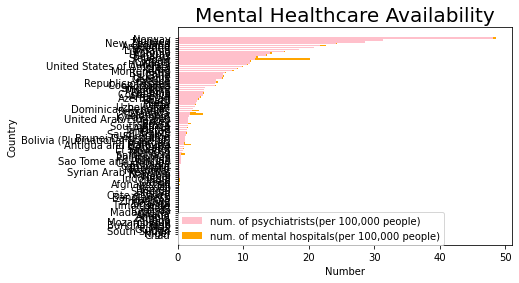

In [32]:
#Visualize the mental healthcare availability
#Prepare data
y1 = dat_mental['Value_p']
y2 = dat_mental['Value_h']
labels = dat_mental['Location']
#Draw the plot
plt.barh(labels, y1, color='pink', label='num. of psychiatrists(per 100,000 people)')
plt.barh(labels, y2, left=y1, color='orange', label='num. of mental hospitals(per 100,000 people)')
#Set up title name and axis name
plt.title("Mental Healthcare Availability",fontsize=20)                                                        
plt.xlabel("Number") 
plt.ylabel("Country") 
#Add the legend
plt.legend(loc=[0, 0]) 
#Set up a suitable size of the plot
plt.rcParams["figure.figsize"] = [10, 40]
#Show the plot in descending order
plt.gca().invert_yaxis()
#Show the plot         
plt.show()

In [33]:
dat_suicide_top20= dat_suicide[dat_suicide['Sex'].isin(['Both sexes'])]
dat_suicide_top20=dat_suicide_top20[['Location','suicide_value']].groupby(['Location']).agg({'suicide_value':'mean'}).sort_values(by='suicide_value',ascending=False).head(20).reset_index()
dat_suicide_top20

,Location,suicide_value
0,Lesotho,77.5045
1,Eswatini,56.9285
2,Guyana,37.8005
3,Russian Federation,34.7780
4,Botswana,32.9420
5,Kiribati,32.4945
6,Lithuania,32.3130
7,Kazakhstan,30.5670
8,Belarus,28.6145
9,Micronesia (Federated States of),27.5580


In [34]:
dat_suicide_top20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       20 non-null     object 
 1   suicide_value  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


Text(0, 0.5, 'Ave num. of suicide (per 100,000 people)')

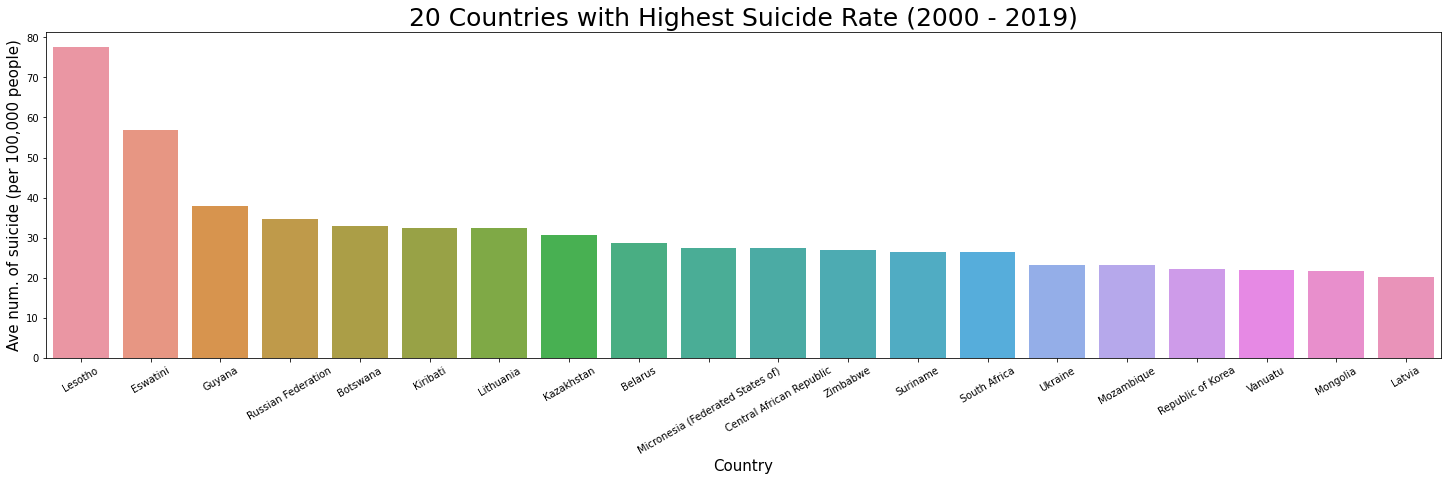

In [35]:
#Plot top 20 countries with highest suicide rates
plt.figure(figsize=(25,6))
su = sns.barplot(dat_suicide_top20['Location'], dat_suicide_top20['suicide_value'])
plt.xticks(rotation= 30)
su.set_title('20 Countries with Highest Suicide Rate (2000 - 2019)', size = 25)
su.set_xlabel('Country', size = 15)
su.set_ylabel('Ave num. of suicide (per 100,000 people)', size = 15)

In [36]:
dat_suicide_top20.loc[dat_suicide_top20['Location'] == 'Eswatini']

,Location,suicide_value
1,Eswatini,56.9285


Text(0, 0.5, 'Male / Female suicide rates')

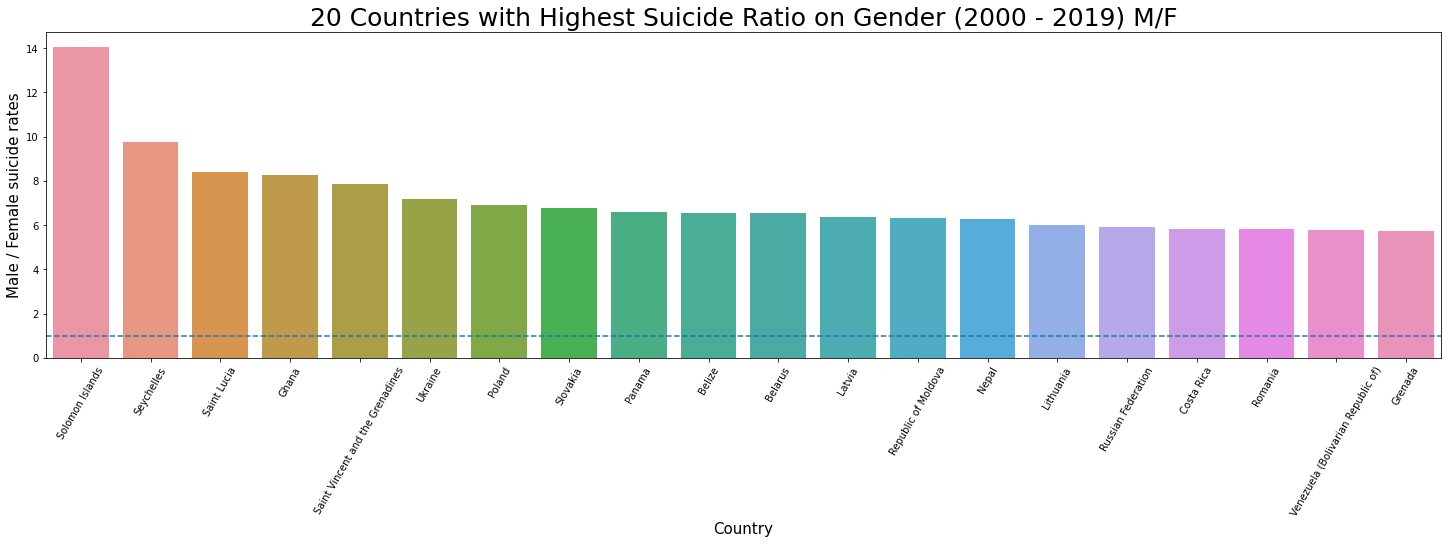

In [37]:


plt.figure(figsize=(25,6))
su = sns.barplot(dat_suicide_ratio1['Location'], dat_suicide_ratio1['ratio_m/f'])
plt.xticks(rotation= 60)
su.set_title('20 Countries with Highest Suicide Ratio on Gender (2000 - 2019) M/F', size = 25)
su.set_xlabel('Country', size = 15)
su.axhline(1, ls='--')
su.set_ylabel('Male / Female suicide rates', size = 15)

Text(0, 0.5, 'Fale / Male suicide rates')

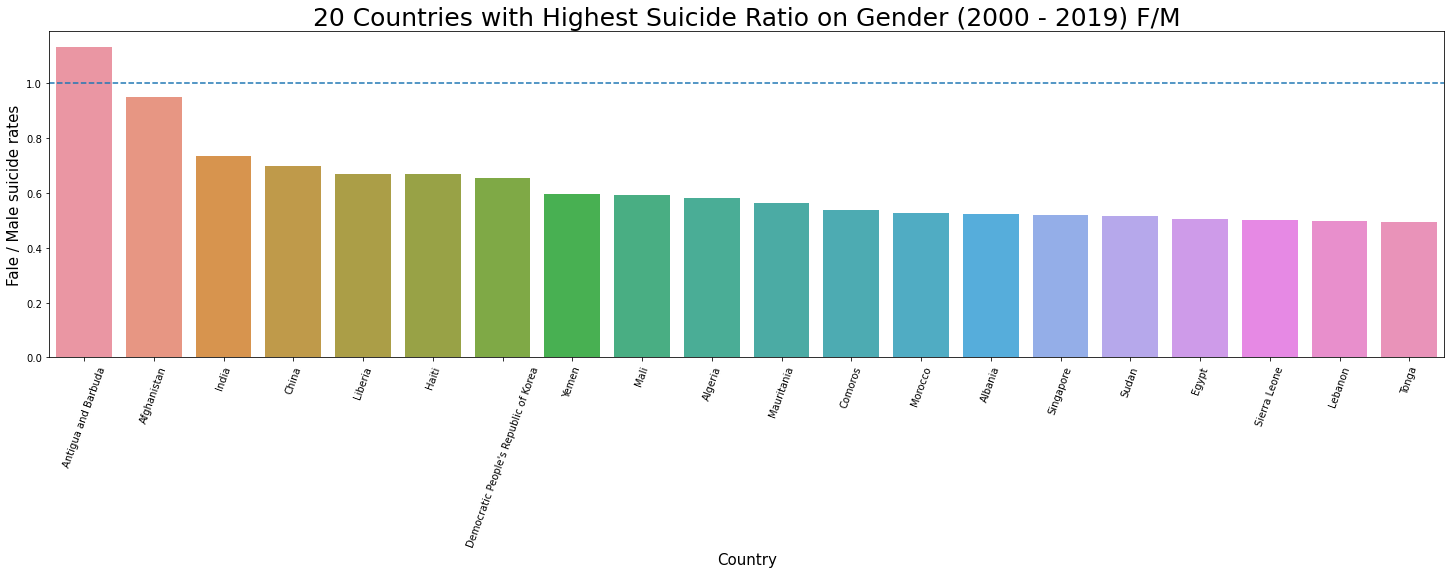

In [38]:


plt.figure(figsize=(25,6))
su = sns.barplot(dat_suicide_ratio2['Location'], dat_suicide_ratio2['ratio_f/m'])
plt.xticks(rotation= 70)
su.set_title('20 Countries with Highest Suicide Ratio on Gender (2000 - 2019) F/M', size = 25)
su.set_xlabel('Country', size = 15)
su.axhline(1, ls='--')
su.set_ylabel('Fale / Male suicide rates', size = 15)

In [39]:
dat_suicide_ratio2.loc[dat_suicide_ratio2['Location'] == 'Guyana']

,Location,ratio_f/m


In [40]:
dat_suicide_gender.loc[dat_suicide_gender['Location'] == 'Guyana']

,Location,Period,suicide_value_male,Sex_x,suicide_value_female,Sex_y,ratio_m/f,ratio_f/m
160,Guyana,2019,64.97,Male,16.96,Female,3.830778,0.261044
341,Guyana,2018,64.43,Male,16.74,Female,3.848865,0.259817
518,Guyana,2017,63.87,Male,16.34,Female,3.908813,0.255832
707,Guyana,2016,63.84,Male,16.08,Female,3.970149,0.251880
887,Guyana,2015,63.51,Male,15.85,Female,4.006940,0.249567
1070,Guyana,2014,66.42,Male,13.57,Female,4.894620,0.204306
1257,Guyana,2013,65.39,Male,17.12,Female,3.819509,0.261814
1437,Guyana,2012,60.46,Male,15.86,Female,3.812106,0.262322
1605,Guyana,2011,56.84,Male,14.84,Female,3.830189,0.261084
1792,Guyana,2010,57.71,Male,15.83,Female,3.645610,0.274303


In [41]:
print("Dataset shape\n",dat_suicide.shape)
print("Check null data\n", dat_suicide.isnull().sum())

Dataset shape
 (10980, 4)
Check null data
 Location         0
Period           0
suicide_value    0
Sex              0
dtype: int64


In [42]:
dat_suicide['Period'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000])

In [43]:
dat_suicide['suicide_value'] = dat_suicide['suicide_value'].astype(float)
dat_suicide['Period'] = dat_suicide['Period'].astype(int)

In [44]:
dat_suicide_sex= dat_suicide[dat_suicide['Sex'].isin(['Male','Female'])]
dat_suicide_sex[['Sex','suicide_value']].groupby(['Sex',]).agg({'suicide_value':'mean'}).style.background_gradient(cmap='cividis')

,suicide_value
Sex,
Female,5.396249
Male,18.742249


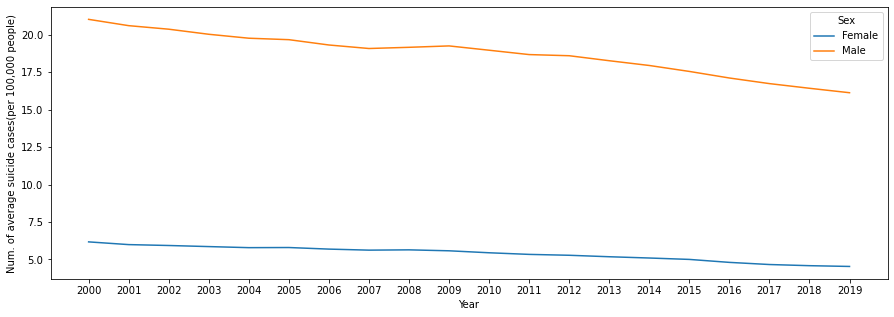

In [45]:
#Plot the relationship between average suicide number and year, by gender.
plt.figure(figsize= (15,5))
plt.xticks([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000])
plt.ylabel("Num. of average suicide cases(per 100,000 people)") 
plt.xlabel("Year") 
suicide_av = dat_suicide_sex.groupby(['Period','Sex']).agg(np.mean)
sns.lineplot(x = 'Period', y = 'suicide_value', data = suicide_av, hue = 'Sex')
plt.show()

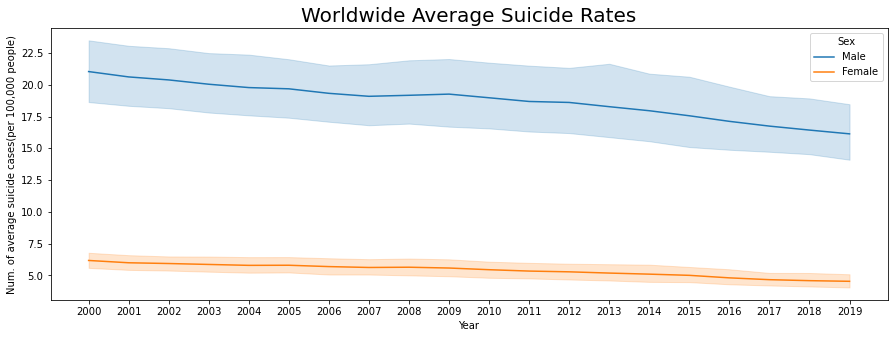

In [46]:
# Plot Worldwide Average Suicide Rates
plt.figure(figsize= (15,5))
plt.xticks([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000])
plt.title("Worldwide Average Suicide Rates",fontsize=20)  
plt.ylabel("Num. of average suicide cases(per 100,000 people)") 
plt.xlabel("Year") 
sns.lineplot(x = 'Period', y = 'suicide_value', data = dat_suicide_sex, hue = 'Sex')
plt.show()

In [47]:
dat_factor.head

<bound method NDFrame.head of        Location  Period  suicide_value         Sex  civil_liberties  health  \
0             4    2019           0.00        Male              NaN     NaN   
1            13    2019           0.16      Female            0.915   2.462   
2            13    2019           0.31  Both sexes            0.915   2.462   
3             4    2019           0.32  Both sexes              NaN     NaN   
4            13    2019           0.49        Male            0.915   2.462   
...         ...     ...            ...         ...              ...     ...   
10975        67    2000           9.73  Both sexes            0.483  -1.897   
10976        63    2000           9.75  Both sexes            0.929  -0.286   
10977       103    2000           9.75        Male            0.924   2.918   
10978       141    2000           9.76  Both sexes            0.716   2.112   
10979       110    2000           9.82      Female            0.785   2.109   

       life_expectanc

In [48]:
#Check NA in the factor dataset
dat_factor.isnull().sum()

Location                    0
Period                      0
suicide_value               0
Sex                         0
civil_liberties          1833
health                   1833
life_expectancy          1893
edu_equality             1833
region                   1833
law                      1833
resource_distribution    1833
welfare                  1833
online_media             1833
women_forcedlabor        1833
_merge                      0
dtype: int64

In [49]:
dat_factor['Period'].value_counts()

2019    549
2018    549
2001    549
2002    549
2003    549
2004    549
2005    549
2006    549
2007    549
2008    549
2009    549
2010    549
2011    549
2012    549
2013    549
2014    549
2015    549
2016    549
2017    549
2000    549
Name: Period, dtype: int64

In [50]:
#Drop the NA
dat_factor=dat_factor.dropna(inplace=False)

In [51]:
print(dat_factor)

       Location  Period  suicide_value         Sex  civil_liberties  health  \
1            13    2019           0.16      Female            0.915   2.462   
2            13    2019           0.31  Both sexes            0.915   2.462   
4            13    2019           0.49        Male            0.915   2.462   
11           87    2019           0.74      Female            0.556   2.520   
14          101    2019           0.85      Female            0.755  -0.490   
...         ...     ...            ...         ...              ...     ...   
10975        67    2000           9.73  Both sexes            0.483  -1.897   
10976        63    2000           9.75  Both sexes            0.929  -0.286   
10977       103    2000           9.75        Male            0.924   2.918   
10978       141    2000           9.76  Both sexes            0.716   2.112   
10979       110    2000           9.82      Female            0.785   2.109   

       life_expectancy  edu_equality  region    law

In [52]:
#Keep 'both sex' in 'sex'column
dat_factor_ml= dat_factor[dat_factor['Sex'].isin(['Both sexes'])]
#Drop 'merge' column
dat_factor_ml.drop('_merge',axis=1,inplace=True)
#Reindex dataframe
dat_factor_ml.index = range(len(dat_factor_ml))


In [53]:
dat_factor_ml

,Location,Period,suicide_value,Sex,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor
0,13,2019,0.31,Both sexes,0.915,2.462,77.3,2.783,19.0,0.929,0.948,1.518,1.018,0.463
1,83,2019,1.98,Both sexes,0.648,1.237,79.6,0.876,10.0,0.645,0.736,0.862,0.253,1.157
2,119,2019,10.15,Both sexes,0.793,-1.119,63.2,-0.988,6.0,0.539,0.278,1.051,-0.073,0.865
3,41,2019,10.19,Both sexes,0.414,2.126,78.5,1.974,19.0,0.277,0.902,2.343,-2.390,1.921
4,117,2019,10.30,Both sexes,0.966,2.349,81.9,2.459,15.0,0.995,0.932,0.484,1.014,1.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024,5,2000,9.20,Both sexes,0.938,1.023,74.2,0.752,18.0,0.669,0.709,0.661,-1.364,1.252
3025,119,2000,9.51,Both sexes,0.781,-0.554,51.8,-0.451,6.0,0.532,0.384,0.571,-0.589,0.286
3026,67,2000,9.73,Both sexes,0.483,-1.897,54.4,-1.062,6.0,0.073,0.165,0.790,-1.329,-0.008
3027,63,2000,9.75,Both sexes,0.929,-0.286,59.4,-0.600,6.0,0.596,0.451,1.100,-1.685,1.580


In [54]:
correlations=dat_factor.corr()
#To be concise, select variable related to death
print(correlations["suicide_value"])

Location                 0.029557
Period                  -0.072598
suicide_value            1.000000
civil_liberties          0.053798
health                   0.019123
life_expectancy         -0.336573
edu_equality             0.091595
region                  -0.110320
law                      0.030562
resource_distribution    0.064297
welfare                  0.027411
online_media            -0.110668
women_forcedlabor        0.123717
Name: suicide_value, dtype: float64


<AxesSubplot:title={'center':'Coerrelation of Factors '}>

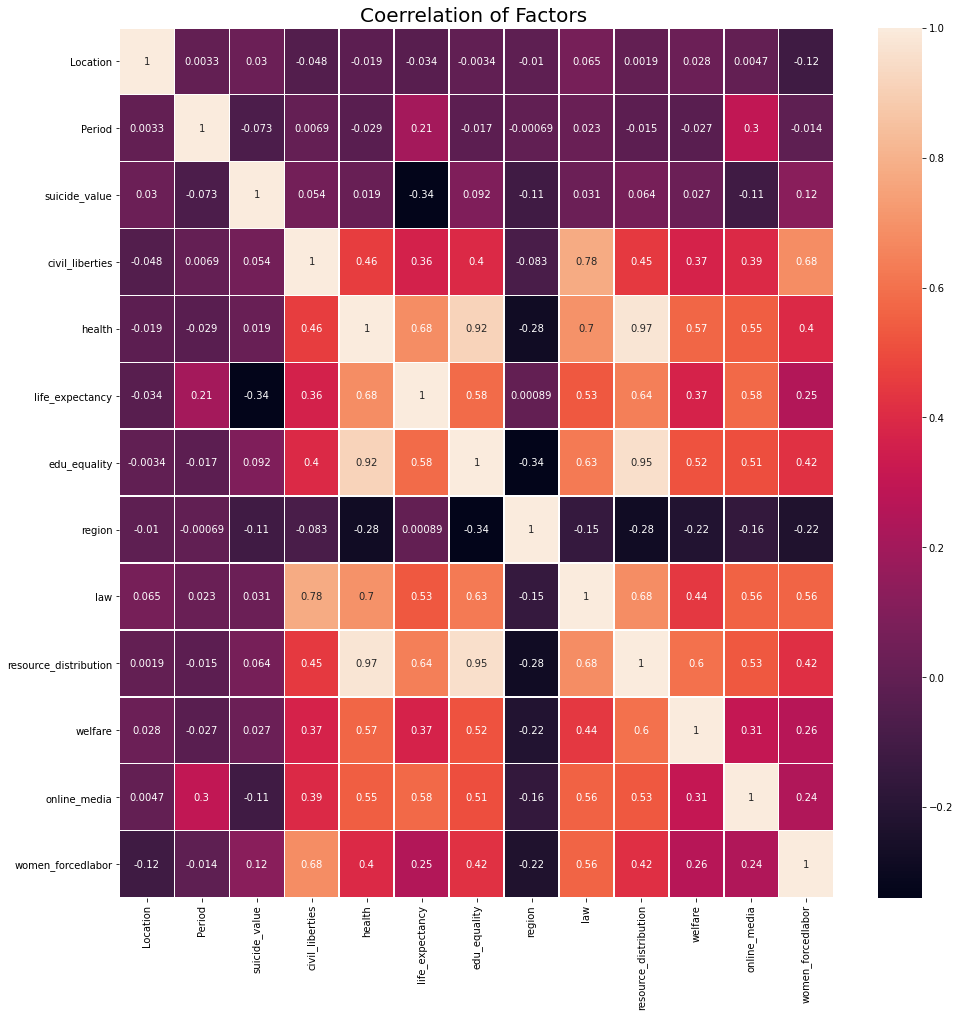

In [55]:
#Show the heatmap of variables
plt.figure(figsize=(16, 16))
plt.title("Coerrelation of Factors ",fontsize=20)   
sns.heatmap(correlations,linewidths = 0.5,annot=True)

In [56]:
dat_factor_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029 entries, 0 to 3028
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               3029 non-null   int64  
 1   Period                 3029 non-null   int64  
 2   suicide_value          3029 non-null   float64
 3   Sex                    3029 non-null   object 
 4   civil_liberties        3029 non-null   float64
 5   health                 3029 non-null   float64
 6   life_expectancy        3029 non-null   float64
 7   edu_equality           3029 non-null   float64
 8   region                 3029 non-null   float64
 9   law                    3029 non-null   float64
 10  resource_distribution  3029 non-null   float64
 11  welfare                3029 non-null   float64
 12  online_media           3029 non-null   float64
 13  women_forcedlabor      3029 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 331.4+

In [57]:
#Split my dataset
y = dat_factor_ml[['suicide_value']]
X = dat_factor_ml.drop(columns=['suicide_value','Sex','Location','Period'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [58]:
train_X

,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor
2111,0.693,-0.386,64.8,0.421,8.0,0.352,0.454,-1.051,-1.628,0.892
2716,0.323,-2.011,55.0,-1.717,6.0,0.076,0.151,0.894,-2.352,-0.465
2184,0.896,0.331,66.1,0.208,7.0,0.722,0.552,0.485,-0.510,2.081
1810,0.710,2.609,82.2,2.385,13.0,0.978,0.936,0.690,0.758,-0.651
1644,0.625,1.108,76.8,0.213,13.0,0.509,0.660,0.696,0.096,0.124
...,...,...,...,...,...,...,...,...,...,...
1147,0.883,-0.525,78.4,-0.753,18.0,0.693,0.385,0.647,0.499,1.110
2154,0.952,2.977,79.6,1.581,1.0,0.950,0.933,1.933,1.037,1.899
1766,0.561,1.230,67.2,1.276,11.0,0.198,0.739,0.804,-0.777,1.105
1122,0.744,-0.385,58.8,-0.608,8.0,0.826,0.400,0.711,1.173,0.458


In [59]:
test_X


,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor
1201,0.891,1.183,74.5,1.192,4.0,0.712,0.775,0.758,-0.308,1.808
220,0.940,2.049,75.3,1.914,2.0,0.954,0.895,1.109,0.606,1.622
2994,0.348,-0.161,72.3,0.871,14.0,0.119,0.492,-1.365,-1.350,0.884
1397,0.911,1.243,74.4,1.424,3.0,0.535,0.796,1.581,0.980,1.693
1973,0.896,0.969,77.3,0.788,19.0,0.856,0.709,0.998,-0.546,1.167
...,...,...,...,...,...,...,...,...,...,...
1565,0.410,-1.208,55.8,-0.968,7.0,0.055,0.206,-0.500,-3.437,0.242
2441,0.707,2.609,80.6,2.385,13.0,0.978,0.936,0.690,0.101,-0.651
1318,0.887,0.279,74.5,-0.559,18.0,0.763,0.522,1.462,0.440,0.271
18,0.425,-1.049,68.6,-0.862,8.0,0.320,0.247,-0.348,-2.366,-0.030


In [60]:
train_y

,suicide_value
2111,9.06
2716,8.35
2184,2.12
1810,8.78
1644,7.27
...,...
1147,3.32
2154,13.28
1766,33.76
1122,18.52


In [61]:
y

,suicide_value
0,0.31
1,1.98
2,10.15
3,10.19
4,10.30
...,...
3024,9.20
3025,9.51
3026,9.73
3027,9.75


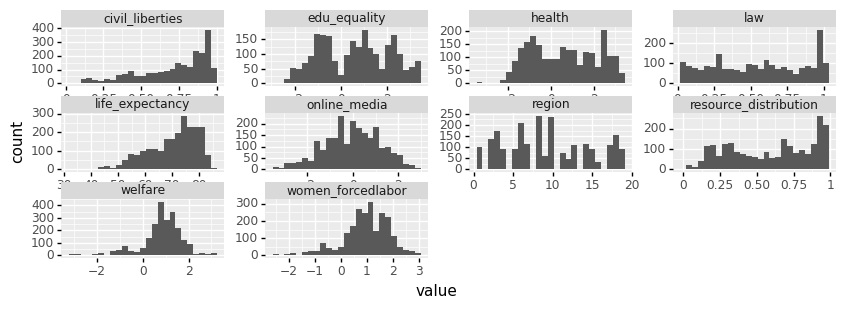

<ggplot: (8767379962167)>

In [62]:
# Plot the continuous Variables 
d = train_X.select_dtypes(include="float").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

It seems that there is no skew in the plots.

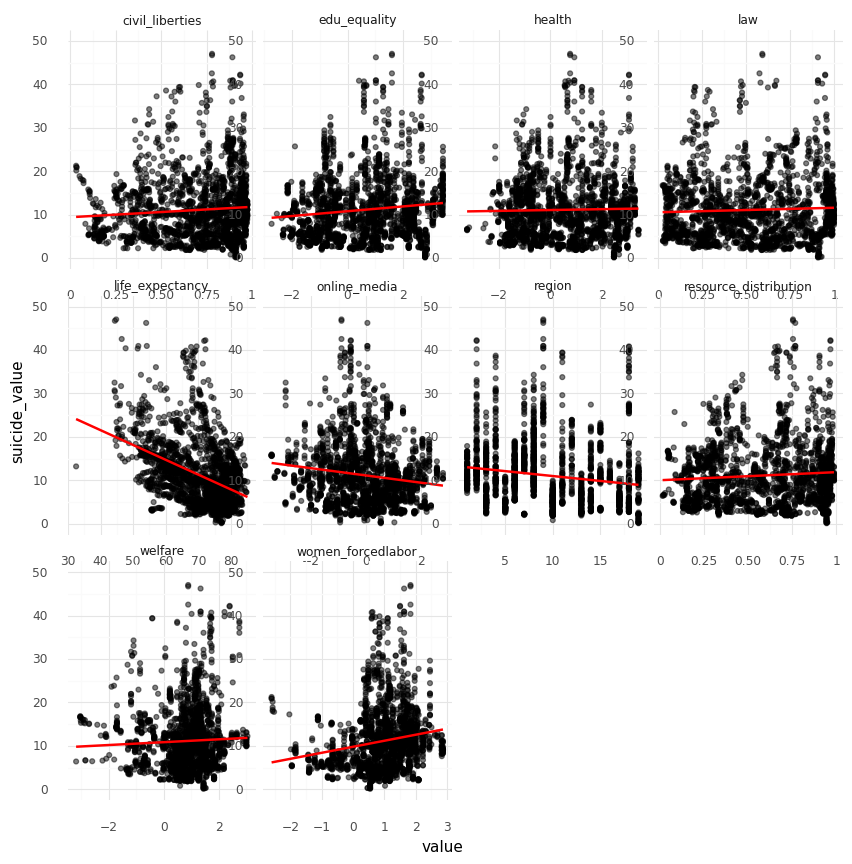

<ggplot: (8767381296354)>

In [63]:
#predictors relate to the outcome.
D = train_X.copy()
D['suicide_value'] = train_y

(
    ggplot(D.melt(id_vars=['suicide_value']),
           aes(x="value",y="suicide_value"))+
    geom_point(alpha=.5) +
    scale_y_continuous(limits=(0,50))+
    facet_wrap("variable",scales="free") +
    geom_smooth(method="lm",se=False,color="red") +
    theme_minimal() +
    theme(figure_size = (10,10)) 
)

# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=1234)
# Next specify the preprocessing steps(standarize)
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['corruption','civil_liberties','health','online_media',
                                                                         'life_expectancy','edu_quality','region','privacy_protect','law','region'])])
# Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])
#Specify the models and their repsective tuning parameters. 
search_space = [
    
   # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,15,20]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[3,4,5,6,7]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
    'model__max_depth':[2,3,4,5,6],
    'model__n_estimators':[500,1000,1500,1700],
    'model__max_features':[6,7,8,9,10]}
    
]

# Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)
#Fit the model to the training data
search.fit(train_X,train_y.values.ravel())



In [64]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=15, shuffle=True,random_state=1234)
# Next specify the preprocessing steps(standarize)
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['civil_liberties','civil_liberties','life_expectancy','edu_equality'
                                                                         ,'region','law','resource_distribution','welfare','online_media','women_forcedlabor'])])
# Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])
#Specify the models and their repsective tuning parameters. 
search_space = [
    
   # Linear Model
    {'model' : [LM()]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[3,4,5,6,7]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[3,5,10,15,20]},
    
     # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
    'model__max_depth':[2,3,4,5,6],
    'model__n_estimators':[500,1000,1500,1700],
    'model__max_features':[6,7,8,9,10]}
    
]

# Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)
#Fit the model to the training data
search.fit(train_X,train_y.values.ravel())




GridSearchCV(cv=KFold(n_splits=15, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [DecisionTreeRegressor()],
                          'model__max_depth': [3, 4, 5, 6, 7]},
                         {'model': [KNeighborsRegressor(n_neighbors=3)],
                          'model__n_neighbors': [3, 5, 10, 15, 20]},
                         {'model': [BaggingRegressor()]},
                         {'model': [RandomForestRegressor()],
                          'model__max_depth': [2, 3, 4, 5, 6],
                          'model__max_features': [6, 7, 8, 9, 10],
                          'model__n_estimators': [500, 1000, 1500, 1700]}],
             scoring='neg_mean_squared_error')

In [65]:
use_metrics = ["neg_mean_squared_error"]
set_k = dict()
for k in [1,2,2,3,5,10,50,100,250]:
    score = cross_validate(KNN(n_neighbors=k),
                           train_X,train_y, 
                           cv = fold_generator, 
                           scoring =use_metrics)
    s = score['test_neg_mean_squared_error']
    set_k[k] = s.mean()
 
set_k

{1: -15.374022919153013,
 2: -12.360226608474933,
 3: -14.700545643966477,
 5: -17.711644783019633,
 10: -23.4114059584772,
 50: -44.18777523927529,
 100: -52.73319506188787,
 250: -67.10567746175859}

In [66]:
search.best_score_ # Mean out-of-sample (CV) error

-4.4713456245120256

In [67]:
search.best_params_

{'model': KNeighborsRegressor(n_neighbors=3), 'model__n_neighbors': 3}

In [68]:
# Predict() method will use the best model out of the scan
pred_y = search.predict(test_X)

In [69]:
m.mean_squared_error(test_y,pred_y)

3.828849171357373

In [70]:
m.r2_score(test_y,pred_y)

0.9466057632575919

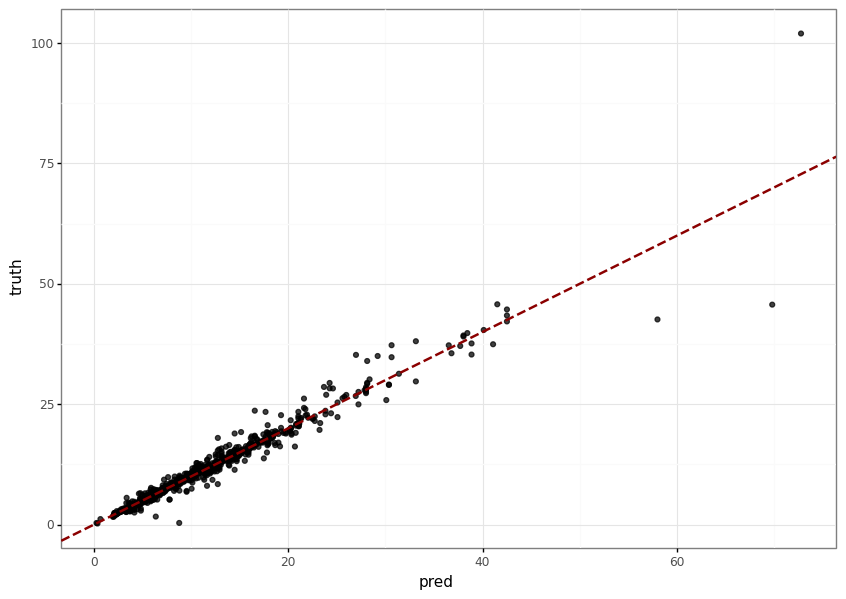

<ggplot: (8767433374757)>

In [71]:
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y.values.ravel())),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)

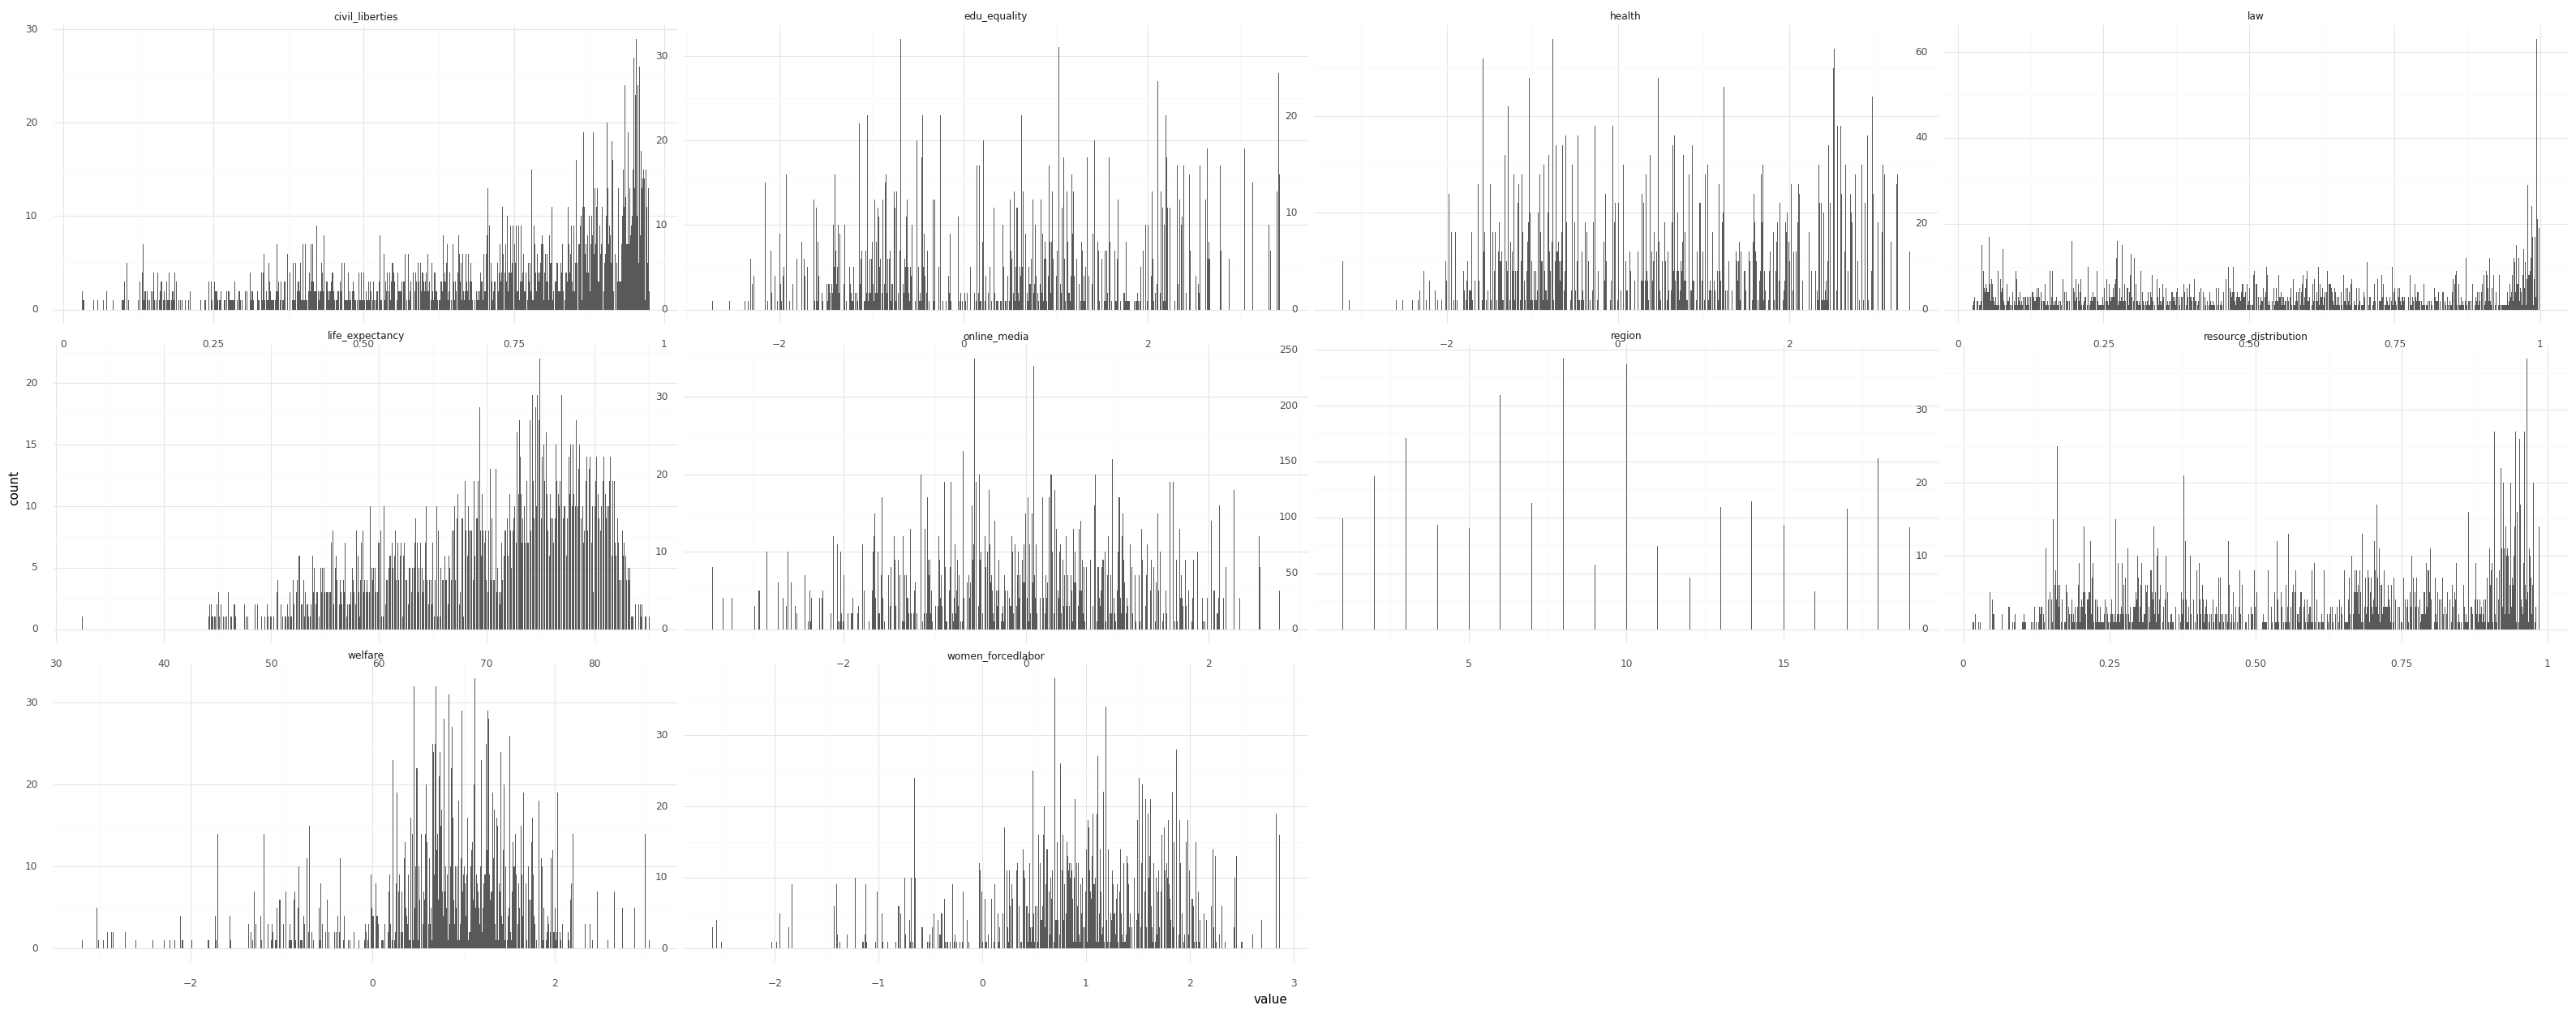

<ggplot: (8767417078495)>

In [72]:
(
    ggplot(train_X.melt(),aes(x="value")) +
    geom_histogram() +
    facet_wrap("variable",scales="free") +
    theme_minimal() +
    theme(figure_size = (40,15)) 
) 

In [73]:
rf_mod = search.best_estimator_

## Permutation Importance

In [74]:
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=5)

In [75]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,life_expectancy,0.872960,0.087159,0.698642,1.047278
1,law,0.543531,0.055291,0.432949,0.654114
2,region,0.467421,0.030893,0.405636,0.529206
3,resource_distribution,0.356192,0.046686,0.262820,0.449565
4,edu_equality,0.354592,0.074533,0.205525,0.503658
5,civil_liberties,0.311421,0.049977,0.211468,0.411375
6,online_media,0.190680,0.008816,0.173047,0.208312
7,health,0.123672,0.007651,0.108371,0.138974
8,women_forcedlabor,0.122429,0.016813,0.088803,0.156056
9,welfare,0.081864,0.011859,0.058145,0.105582


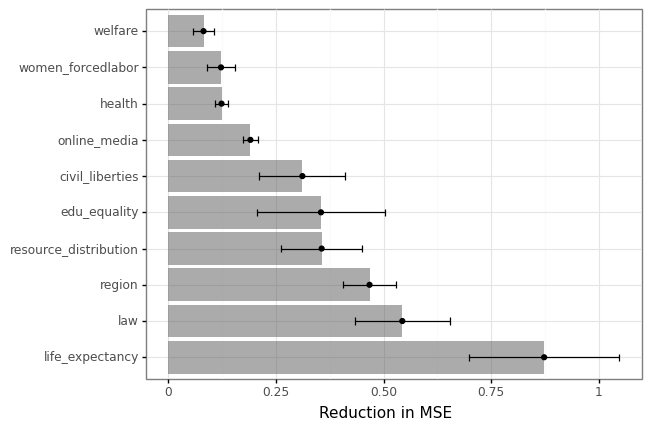

<ggplot: (8767434395829)>

In [76]:
# Plot
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in MSE",x="")
)

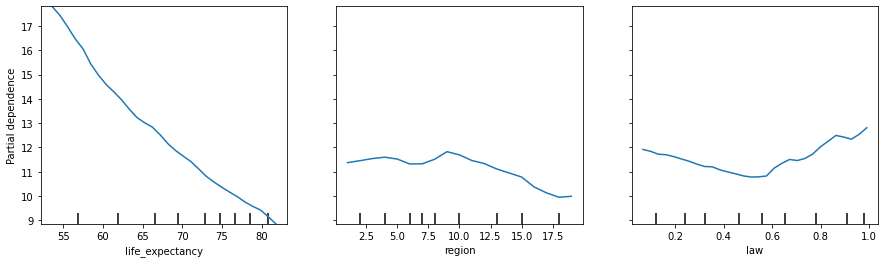

In [77]:
# Target specific features
features = ['life_expectancy','region', 'law']

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    rf_mod, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)


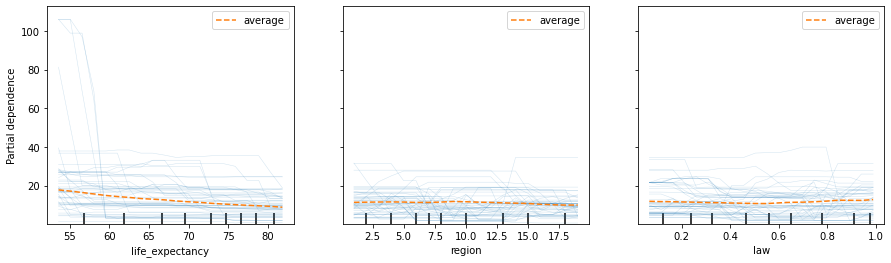

In [78]:
features = ['life_expectancy','region','law']

fig, axes = plt.subplots(figsize=(15, 4))
#axes = axes.set_yticks(range(5, 50, 5))
#axes = plt.yticks(range(5, 50, 5),range(5, 50, 5),range(5, 50, 5),range(5, 50, 5))
#for ax in axes.flatten():
#    ax.set_yticks(range(5, 50, 5))
display = PartialDependenceDisplay.from_estimator(
    rf_mod,
    train_X,
    features,
    kind="both", # "average" = just PDP, "individual" = just ICE
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    n_cols=len(features),
    ax = axes
)
display.figure_.subplots_adjust(hspace=0.3)

In [79]:
predict_X = dat_dem_2020

In [80]:
predict_X

,Location,Period,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor
0,106,2020,0.707,-0.845,75.7,-0.660,17,0.519,0.299,0.110,0.570,0.678
1,156,2020,0.856,1.115,72.4,0.608,18,0.707,0.698,1.165,1.332,0.420
2,157,2020,0.958,1.847,82.9,1.419,2,0.994,0.870,2.592,2.563,2.609
3,158,2020,0.949,3.097,84.4,3.143,1,0.996,0.970,1.489,0.765,1.966
4,63,2020,0.914,0.642,66.4,-0.266,6,0.597,0.568,0.715,-0.322,1.306
...,...,...,...,...,...,...,...,...,...,...,...,...
174,146,2020,0.831,-1.269,69.0,-0.278,15,0.603,0.308,0.993,0.307,0.751
175,177,2020,0.853,0.577,65.1,1.584,15,0.793,0.706,0.221,0.347,1.010
176,172,2020,0.401,2.647,73.8,1.871,10,0.733,0.913,1.108,1.828,-0.359
177,72,2020,0.831,0.682,77.3,0.710,4,0.659,0.632,0.552,-0.117,0.923


In [81]:
predict_X["Location"].unique()

array([106, 156, 157, 158, 63, 148, 82, 113, 134, 1, 49, 180, 35, 130, 22,
       174, 131, 50, 12, 19, 70, 71, 102, 124, 128, 139, 150, 155, 179, 0,
       5, 55, 74, 85, 121, 149, 'Kosovo', 91, 120, 129, 161, 'Taiwan',
       162, 170, 178, 17, 18, 25, 28, 75, 112, 115, 118, 119, 181, 182,
       67, 39, 104, 30, 7, 21, 26, 27, 31, 33, 38, 163, 48, 58, 62, 66,
       76, 77, 78, 80, 83, 90, 92, 93, 99, 101, 109, 111, 116, 125, 126,
       132, 142, 151, 159, 167, 168, 171, 173, 175, 2, 3, 6, 9, 14, 29,
       32, 34, 44, 37, 46, 47, 52, 59, 60, 61, 68, 81, 84, 88, 89, 94, 98,
       108, 114, 'Palestine', 135, 147, 152, 54, 160, 164, 166, 169, 176,
       8, 11, 13, 15, 20, 24, 36, 40, 41, 42, 43, 45, 51, 53, 56, 57, 64,
       69, 'Hong Kong', 73, 79, 87, 95, 96, 97, 100, 103, 105, 110, 117,
       122, 123, 127, 133, 137, 138, 140, 141, 143, 144, 145, 146, 177,
       172, 72, 'not found'], dtype=object)

In [82]:
#Delete the countries or cities that are not included in machine learning datatset
predict_X = predict_X[~predict_X["Location"].isin(['not found','Kosovo','Taiwan','Palestine','Hong Kong'])]

In [83]:
#Check the new dataset
predict_X["Location"].unique()

array([106, 156, 157, 158, 63, 148, 82, 113, 134, 1, 49, 180, 35, 130, 22,
       174, 131, 50, 12, 19, 70, 71, 102, 124, 128, 139, 150, 155, 179, 0,
       5, 55, 74, 85, 121, 149, 91, 120, 129, 161, 162, 170, 178, 17, 18,
       25, 28, 75, 112, 115, 118, 119, 181, 182, 67, 39, 104, 30, 7, 21,
       26, 27, 31, 33, 38, 163, 48, 58, 62, 66, 76, 77, 78, 80, 83, 90,
       92, 93, 99, 101, 109, 111, 116, 125, 126, 132, 142, 151, 159, 167,
       168, 171, 173, 175, 2, 3, 6, 9, 14, 29, 32, 34, 44, 37, 46, 47, 52,
       59, 60, 61, 68, 81, 84, 88, 89, 94, 98, 108, 114, 135, 147, 152,
       54, 160, 164, 166, 169, 176, 8, 11, 13, 15, 20, 24, 36, 40, 41, 42,
       43, 45, 51, 53, 56, 57, 64, 69, 73, 79, 87, 95, 96, 97, 100, 103,
       105, 110, 117, 122, 123, 127, 133, 137, 138, 140, 141, 143, 144,
       145, 146, 177, 172, 72], dtype=object)

In [84]:
#Drop the NA
predict_X=predict_X.dropna(inplace=False)
#Reindex dataframe
predict_X.index = range(len(predict_X))
#Drop 'Location'and 'Period' to fit the model
predict_X1 = predict_X.drop(columns=['Location','Period'])


In [85]:
predict_X1

,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor
0,0.707,-0.845,75.7,-0.660,17,0.519,0.299,0.110,0.570,0.678
1,0.856,1.115,72.4,0.608,18,0.707,0.698,1.165,1.332,0.420
2,0.958,1.847,82.9,1.419,2,0.994,0.870,2.592,2.563,2.609
3,0.949,3.097,84.4,3.143,1,0.996,0.970,1.489,0.765,1.966
4,0.914,0.642,66.4,-0.266,6,0.597,0.568,0.715,-0.322,1.306
...,...,...,...,...,...,...,...,...,...,...
166,0.854,1.071,81.6,1.424,3,0.835,0.776,1.276,0.384,1.438
167,0.831,-1.269,69.0,-0.278,15,0.603,0.308,0.993,0.307,0.751
168,0.853,0.577,65.1,1.584,15,0.793,0.706,0.221,0.347,1.010
169,0.401,2.647,73.8,1.871,10,0.733,0.913,1.108,1.828,-0.359


In [86]:
#Make prediction of 2020 suicide rates
predict_y = search.predict(predict_X1)

In [87]:
predict_y


array([ 5.55      , 25.57666667, 12.52      , 10.06666667, 11.41666667,
       24.57333333, 13.92333333, 12.79666667,  2.63333333,  4.04      ,
        3.61      ,  6.85666667,  3.88333333, 18.83      ,  4.85333333,
       13.18666667,  7.36666667,  4.92      ,  3.74333333,  5.82      ,
       11.33      ,  2.61333333,  7.99333333,  9.93      ,  2.73666667,
        5.66666667,  6.58333333,  8.48666667, 19.55      ,  6.02333333,
        8.49333333,  9.86333333, 12.75666667, 10.88      ,  9.55      ,
       10.97666667,  2.76      ,  7.13666667,  2.58333333,  3.23333333,
        7.66      , 10.34666667,  3.92333333, 13.12      ,  5.10666667,
       11.66333333,  5.71333333,  2.94      , 23.15666667,  9.98666667,
        4.51      , 10.14333333, 12.68333333, 30.09      , 11.98666667,
       18.81      ,  5.67      , 10.13666667, 11.43333333, 22.55666667,
       12.39666667, 16.29666667, 20.67      ,  8.50666667,  5.88666667,
        3.32      ,  8.35333333, 11.48666667,  5.79666667,  7.06

In [88]:
predict_y = pd.DataFrame(predict_y)
predict_y

,0
0,5.550000
1,25.576667
2,12.520000
3,10.066667
4,11.416667
...,...
166,18.830000
167,17.793333
168,21.093333
169,5.220000


In [89]:
#Prediction results
predict_X['suicide_value']=predict_y
predict_X

,Location,Period,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor,suicide_value
0,106,2020,0.707,-0.845,75.7,-0.660,17,0.519,0.299,0.110,0.570,0.678,5.550000
1,156,2020,0.856,1.115,72.4,0.608,18,0.707,0.698,1.165,1.332,0.420,25.576667
2,157,2020,0.958,1.847,82.9,1.419,2,0.994,0.870,2.592,2.563,2.609,12.520000
3,158,2020,0.949,3.097,84.4,3.143,1,0.996,0.970,1.489,0.765,1.966,10.066667
4,63,2020,0.914,0.642,66.4,-0.266,6,0.597,0.568,0.715,-0.322,1.306,11.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,145,2020,0.854,1.071,81.6,1.424,3,0.835,0.776,1.276,0.384,1.438,18.830000
167,146,2020,0.831,-1.269,69.0,-0.278,15,0.603,0.308,0.993,0.307,0.751,17.793333
168,177,2020,0.853,0.577,65.1,1.584,15,0.793,0.706,0.221,0.347,1.010,21.093333
169,172,2020,0.401,2.647,73.8,1.871,10,0.733,0.913,1.108,1.828,-0.359,5.220000


In [90]:
#Change the key and value for res dictionary
dict(zip(res.values(),res))

{0: 'Afghanistan',
 1: 'Albania',
 2: 'Algeria',
 3: 'Angola',
 4: 'Antigua and Barbuda',
 5: 'Argentina',
 6: 'Armenia',
 7: 'Australia',
 8: 'Austria',
 9: 'Azerbaijan',
 10: 'Bahamas',
 11: 'Bahrain',
 12: 'Bangladesh',
 13: 'Barbados',
 14: 'Belarus',
 15: 'Belgium',
 16: 'Belize',
 17: 'Benin',
 18: 'Bhutan',
 19: 'Bolivia',
 20: 'Bosnia and Herzegovina',
 21: 'Botswana',
 22: 'Brazil',
 23: 'Brunei Darussalam',
 24: 'Bulgaria',
 25: 'Burkina Faso',
 26: 'Burundi',
 27: 'Cabo Verde',
 28: 'Cambodia',
 29: 'Cameroon',
 30: 'Canada',
 31: 'Central African Republic',
 32: 'Chad',
 33: 'Chile',
 34: 'China',
 35: 'Colombia',
 36: 'Comoros',
 37: 'Congo Republic',
 38: 'Costa Rica',
 39: "Cote d'Ivoire",
 40: 'Croatia',
 41: 'Cuba',
 42: 'Cyprus',
 43: 'Czech Republic',
 44: 'DR Congo',
 45: 'Denmark',
 46: 'Djibouti',
 47: 'Dominican Republic',
 48: 'Ecuador',
 49: 'Egypt',
 50: 'El Salvador',
 51: 'Equatorial Guinea',
 52: 'Eritrea',
 53: 'Estonia',
 54: 'Eswatini',
 55: 'Ethiopia',


In [91]:
predict_X['Location'] = predict_X['Location'].replace({0: 'Afghanistan',
 1: 'Albania',
 2: 'Algeria',
 3: 'Angola',
 4: 'Antigua and Barbuda',
 5: 'Argentina',
 6: 'Armenia',
 7: 'Australia',
 8: 'Austria',
 9: 'Azerbaijan',
 10: 'Bahamas',
 11: 'Bahrain',
 12: 'Bangladesh',
 13: 'Barbados',
 14: 'Belarus',
 15: 'Belgium',
 16: 'Belize',
 17: 'Benin',
 18: 'Bhutan',
 19: 'Bolivia',
 20: 'Bosnia and Herzegovina',
 21: 'Botswana',
 22: 'Brazil',
 23: 'Brunei Darussalam',
 24: 'Bulgaria',
 25: 'Burkina Faso',
 26: 'Burundi',
 27: 'Cabo Verde',
 28: 'Cambodia',
 29: 'Cameroon',
 30: 'Canada',
 31: 'Central African Republic',
 32: 'Chad',
 33: 'Chile',
 34: 'China',
 35: 'Colombia',
 36: 'Comoros',
 37: 'Congo Republic',
 38: 'Costa Rica',
 39: "Cote d'Ivoire",
 40: 'Croatia',
 41: 'Cuba',
 42: 'Cyprus',
 43: 'Czech Republic',
 44: 'DR Congo',
 45: 'Denmark',
 46: 'Djibouti',
 47: 'Dominican Republic',
 48: 'Ecuador',
 49: 'Egypt',
 50: 'El Salvador',
 51: 'Equatorial Guinea',
 52: 'Eritrea',
 53: 'Estonia',
 54: 'Eswatini',
 55: 'Ethiopia',
 56: 'Fiji',
 57: 'Finland',
 58: 'France',
 59: 'Gabon',
 60: 'Gambia',
 61: 'Georgia',
 62: 'Germany',
 63: 'Ghana',
 64: 'Greece',
 65: 'Grenada',
 66: 'Guatemala',
 67: 'Guinea',
 68: 'Guinea-Bissau',
 69: 'Guyana',
 70: 'Haiti',
 71: 'Honduras',
 72: 'Hungary',
 73: 'Iceland',
 74: 'India',
 75: 'Indonesia',
 76: 'Iran',
 77: 'Iraq',
 78: 'Ireland',
 79: 'Israel',
 80: 'Italy',
 81: 'Jamaica',
 82: 'Japan',
 83: 'Jordan',
 84: 'Kazakhstan',
 85: 'Kenya',
 86: 'Kiribati',
 87: 'Kuwait',
 88: 'Kyrgyz Republic',
 89: 'Laos',
 90: 'Latvia',
 91: 'Lebanon',
 92: 'Lesotho',
 93: 'Liberia',
 94: 'Libya',
 95: 'Lithuania',
 96: 'Luxembourg',
 97: 'Macedonia',
 98: 'Madagascar',
 99: 'Malawi',
 100: 'Malaysia',
 101: 'Maldives',
 102: 'Mali',
 103: 'Malta',
 104: 'Mauritania',
 105: 'Mauritius',
 106: 'Mexico',
 107: 'Micronesia, Fed. Sts.',
 108: 'Moldova',
 109: 'Mongolia',
 110: 'Montenegro',
 111: 'Morocco',
 112: 'Mozambique',
 113: 'Myanmar',
 114: 'Namibia',
 115: 'Nepal',
 116: 'Netherlands',
 117: 'New Zealand',
 118: 'Nicaragua',
 119: 'Niger',
 120: 'Nigeria',
 121: 'North Korea',
 122: 'Norway',
 123: 'Oman',
 124: 'Pakistan',
 125: 'Panama',
 126: 'Papua New Guinea',
 127: 'Paraguay',
 128: 'Peru',
 129: 'Philippines',
 130: 'Poland',
 131: 'Portugal',
 132: 'Qatar',
 133: 'Romania',
 134: 'Russia',
 135: 'Rwanda',
 136: 'Samoa',
 137: 'Sao Tome and Principe',
 138: 'Saudi Arabia',
 139: 'Senegal',
 140: 'Serbia',
 141: 'Seychelles',
 142: 'Sierra Leone',
 143: 'Singapore',
 144: 'Slovakia',
 145: 'Slovenia',
 146: 'Solomon Islands',
 147: 'Somalia',
 148: 'South Africa',
 149: 'South Korea',
 150: 'South Sudan',
 151: 'Spain',
 152: 'Sri Lanka',
 153: 'St. Lucia',
 154: 'St. Vincent and the Grenadines',
 155: 'Sudan',
 156: 'Suriname',
 157: 'Sweden',
 158: 'Switzerland',
 159: 'Syria',
 160: 'Tajikistan',
 161: 'Tanzania',
 162: 'Thailand',
 163: 'Timor-Leste',
 164: 'Togo',
 165: 'Tonga',
 166: 'Trinidad and Tobago',
 167: 'Tunisia',
 168: 'Turkey',
 169: 'Turkmenistan',
 170: 'Uganda',
 171: 'Ukraine',
 172: 'United Arab Emirates',
 173: 'United Kingdom',
 174: 'United States',
 175: 'Uruguay',
 176: 'Uzbekistan',
 177: 'Vanuatu',
 178: 'Venezuela',
 179: 'Vietnam',
 180: 'Yemen',
 181: 'Zambia',
 182: 'Zimbabwe'})

In [92]:
predict_X

,Location,Period,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor,suicide_value
0,Mexico,2020,0.707,-0.845,75.7,-0.660,17,0.519,0.299,0.110,0.570,0.678,5.550000
1,Suriname,2020,0.856,1.115,72.4,0.608,18,0.707,0.698,1.165,1.332,0.420,25.576667
2,Sweden,2020,0.958,1.847,82.9,1.419,2,0.994,0.870,2.592,2.563,2.609,12.520000
3,Switzerland,2020,0.949,3.097,84.4,3.143,1,0.996,0.970,1.489,0.765,1.966,10.066667
4,Ghana,2020,0.914,0.642,66.4,-0.266,6,0.597,0.568,0.715,-0.322,1.306,11.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Slovenia,2020,0.854,1.071,81.6,1.424,3,0.835,0.776,1.276,0.384,1.438,18.830000
167,Solomon Islands,2020,0.831,-1.269,69.0,-0.278,15,0.603,0.308,0.993,0.307,0.751,17.793333
168,Vanuatu,2020,0.853,0.577,65.1,1.584,15,0.793,0.706,0.221,0.347,1.010,21.093333
169,United Arab Emirates,2020,0.401,2.647,73.8,1.871,10,0.733,0.913,1.108,1.828,-0.359,5.220000


In [93]:
predict_china = predict_X.loc[predict_X['Location'] == 'China']
predict_china

,Location,Period,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor,suicide_value
101,China,2020,0.196,-0.754,77.7,-0.182,12,0.343,0.404,0.848,1.586,-0.554,7.05


In [94]:
china_data = dat_factor_ml.loc[dat_factor_ml['Location']== 34]
china_data

,Location,Period,suicide_value,Sex,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor
110,34,2019,6.67,Both sexes,0.218,-0.633,77.5,-0.182,12.0,0.358,0.444,1.064,1.833,-0.554
267,34,2018,6.81,Both sexes,0.212,-0.621,77.3,-0.044,12.0,0.373,0.451,1.018,1.579,-0.480
423,34,2017,6.89,Both sexes,0.237,-0.565,77.1,-0.044,12.0,0.360,0.446,0.768,1.579,-0.269
575,34,2016,6.99,Both sexes,0.253,-0.601,76.7,-0.136,12.0,0.363,0.434,1.029,1.579,-0.269
730,34,2015,7.08,Both sexes,0.255,-0.601,76.5,-0.136,12.0,0.364,0.424,1.029,1.579,-0.230
888,34,2014,7.35,Both sexes,0.247,-0.601,76.5,-0.032,12.0,0.367,0.440,0.772,1.579,-0.286
1041,34,2013,7.65,Both sexes,0.247,-0.601,76.5,-0.032,12.0,0.360,0.448,1.079,1.579,-0.286
1195,34,2012,8.14,Both sexes,0.273,-0.463,76.2,-0.057,12.0,0.348,0.475,1.270,1.579,-0.286
1359,34,2011,8.84,Both sexes,0.269,-0.463,76.0,-0.057,12.0,0.333,0.475,1.270,1.579,-0.286
1517,34,2010,9.59,Both sexes,0.278,-0.463,75.8,-0.057,12.0,0.334,0.477,1.204,1.579,-0.286


In [95]:
china_data['Location']=china_data['Location'].loc[china_data['Location'] == '34']='China'
china_data

,Location,Period,suicide_value,Sex,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor
110,China,2019,6.67,Both sexes,0.218,-0.633,77.5,-0.182,12.0,0.358,0.444,1.064,1.833,-0.554
267,China,2018,6.81,Both sexes,0.212,-0.621,77.3,-0.044,12.0,0.373,0.451,1.018,1.579,-0.480
423,China,2017,6.89,Both sexes,0.237,-0.565,77.1,-0.044,12.0,0.360,0.446,0.768,1.579,-0.269
575,China,2016,6.99,Both sexes,0.253,-0.601,76.7,-0.136,12.0,0.363,0.434,1.029,1.579,-0.269
730,China,2015,7.08,Both sexes,0.255,-0.601,76.5,-0.136,12.0,0.364,0.424,1.029,1.579,-0.230
888,China,2014,7.35,Both sexes,0.247,-0.601,76.5,-0.032,12.0,0.367,0.440,0.772,1.579,-0.286
1041,China,2013,7.65,Both sexes,0.247,-0.601,76.5,-0.032,12.0,0.360,0.448,1.079,1.579,-0.286
1195,China,2012,8.14,Both sexes,0.273,-0.463,76.2,-0.057,12.0,0.348,0.475,1.270,1.579,-0.286
1359,China,2011,8.84,Both sexes,0.269,-0.463,76.0,-0.057,12.0,0.333,0.475,1.270,1.579,-0.286
1517,China,2010,9.59,Both sexes,0.278,-0.463,75.8,-0.057,12.0,0.334,0.477,1.204,1.579,-0.286


In [96]:
china_data= china_data.append(predict_china, ignore_index=True)
china_data

,Location,Period,suicide_value,Sex,civil_liberties,health,life_expectancy,edu_equality,region,law,resource_distribution,welfare,online_media,women_forcedlabor
0,China,2019,6.67,Both sexes,0.218,-0.633,77.5,-0.182,12.0,0.358,0.444,1.064,1.833,-0.554
1,China,2018,6.81,Both sexes,0.212,-0.621,77.3,-0.044,12.0,0.373,0.451,1.018,1.579,-0.480
2,China,2017,6.89,Both sexes,0.237,-0.565,77.1,-0.044,12.0,0.360,0.446,0.768,1.579,-0.269
3,China,2016,6.99,Both sexes,0.253,-0.601,76.7,-0.136,12.0,0.363,0.434,1.029,1.579,-0.269
4,China,2015,7.08,Both sexes,0.255,-0.601,76.5,-0.136,12.0,0.364,0.424,1.029,1.579,-0.230
5,China,2014,7.35,Both sexes,0.247,-0.601,76.5,-0.032,12.0,0.367,0.440,0.772,1.579,-0.286
6,China,2013,7.65,Both sexes,0.247,-0.601,76.5,-0.032,12.0,0.360,0.448,1.079,1.579,-0.286
7,China,2012,8.14,Both sexes,0.273,-0.463,76.2,-0.057,12.0,0.348,0.475,1.270,1.579,-0.286
8,China,2011,8.84,Both sexes,0.269,-0.463,76.0,-0.057,12.0,0.333,0.475,1.270,1.579,-0.286
9,China,2010,9.59,Both sexes,0.278,-0.463,75.8,-0.057,12.0,0.334,0.477,1.204,1.579,-0.286


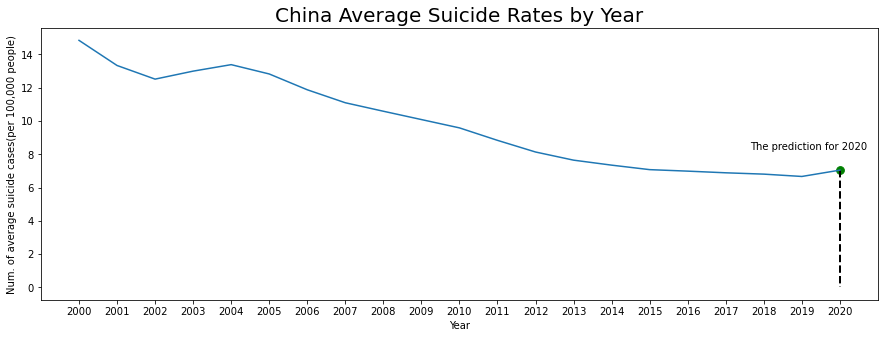

In [97]:
#Plot the suicide trend for China from 2000-2020(2020 is prediction)
plt.figure(figsize= (15,5))
plt.xticks([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000])
plt.title("China Average Suicide Rates by Year",fontsize=20)  
plt.ylabel("Num. of average suicide cases(per 100,000 people)") 
plt.xlabel("Year") 
x0 = 2020
y0 = 7.05
plt.scatter(x0,y0,s=60,color='g')        
plt.plot([x0,x0],[y0,0],'k--',linewidth=2)  
plt.annotate(r"The prediction for 2020",xy=(x0,y0),xytext=(-90,+20),
                 textcoords='offset points')

sns.lineplot(x = 'Period', y = 'suicide_value', data = china_data)
plt.show()